# Linear Regression Assignment
## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Stage 1: Data Understanding and Preparations

### 1.1 Load and Explore the Data
Load the dataset and explore the first few rows to understand the structure

In [6]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import math
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
data = pd.read_csv('day.csv')

In [10]:
# Display the first few rows of the dataset to understand its structure
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 1.2 Data Quality Checks
Check for missing values, duplicates and data types.

In [24]:
# Check for missing values
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [27]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [30]:
# Verify data types
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

There are no missing values and duplicates from the given dataset

In [35]:
# Check for missing values and data types for following columns
print(data[['cnt', 'temp', 'hum', 'windspeed']].isnull().sum())
print(data[['cnt', 'temp', 'hum', 'windspeed']].dtypes)

cnt          0
temp         0
hum          0
windspeed    0
dtype: int64
cnt            int64
temp         float64
hum          float64
windspeed    float64
dtype: object


In [38]:
# Drop unnecessary columns like 'instant' and 'atemp' (since 'temp' is sufficient)
data.drop(['instant', 'atemp'], axis=1, inplace=True)

### 1.3 Convert Categorical Variables
Convert season, weathersit, mnth, and weekday to categorical variables.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy -> as **clear**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -> as **mist**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + S -> as **light_rain**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> as **heavy_rain**


In [46]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})
data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})
data['weekday'] = data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [49]:
# Verify changes
print(data.head())

       dteday  season    yr mnth  holiday    weekday  workingday weathersit  \
0  01-01-2018  spring  2018  Jan        0   Saturday           0       mist   
1  02-01-2018  spring  2018  Jan        0     Sunday           0       mist   
2  03-01-2018  spring  2018  Jan        0     Monday           1      clear   
3  04-01-2018  spring  2018  Jan        0    Tuesday           1      clear   
4  05-01-2018  spring  2018  Jan        0  Wednesday           1      clear   

        temp      hum  windspeed  casual  registered   cnt  
0  14.110847  80.5833  10.749882     331         654   985  
1  14.902598  69.6087  16.652113     131         670   801  
2   8.050924  43.7273  16.636703     120        1229  1349  
3   8.200000  59.0435  10.739832     108        1454  1562  
4   9.305237  43.6957  12.522300      82        1518  1600  


In [53]:
print("Date Range:", data['dteday'].min(), "to", data['dteday'].max())

Date Range: 01-01-2018 to 31-12-2019


### 1.4 Dummy Variables

In [61]:
#Assigning a new variable bike_data form here onwards to use model building
bike_data = data
# Create dummy variables
bike_data_dummies = pd.get_dummies(data, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)

# Drop columns that are not necessary for the model
bike_data_dummies = bike_data_dummies.drop(columns=['dteday', 'casual', 'registered'])

# Display the first few rows of the modified dataset
bike_data_dummies.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### 1.5 Outliers detection
Since we don't have missing values in this dataset, detect if any outliers

In [68]:
# Calculate basic statistics for 'cnt'
cnt_stats = bike_data['cnt'].describe()
print(cnt_stats)

# Calculate IQR (Interquartile Range)
Q1 = bike_data['cnt'].quantile(0.25)
Q3 = bike_data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bike_data[(bike_data['cnt'] < lower_bound) | (bike_data['cnt'] > upper_bound)]
print("Outliers:")
print(outliers[['dteday', 'cnt']])

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64
Outliers:
Empty DataFrame
Columns: [dteday, cnt]
Index: []


**No Outliers Detected:** According to the statistics provided (mean, min, max, quartiles), there are no values of 'cnt' that fall below the lower bound or above the upper bound calculated using the IQR method. This suggests that all values of 'cnt' are within a reasonable range based on this statistical measure.

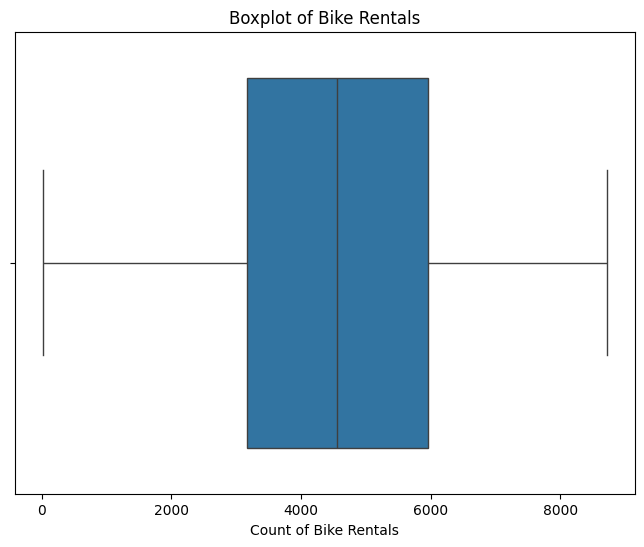

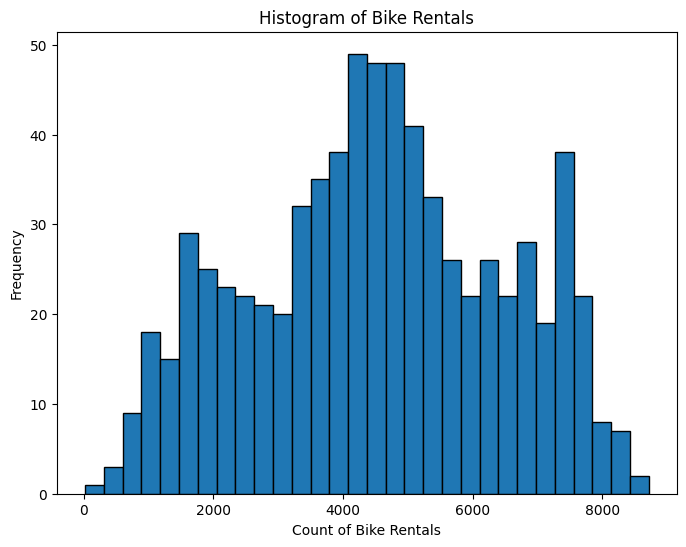

In [79]:
# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=bike_data['cnt'])
plt.title('Boxplot of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(8, 6))
plt.hist(bike_data['cnt'], bins=30, edgecolor='black')
plt.title('Histogram of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

### 1.6 Visualising the Data & EDA

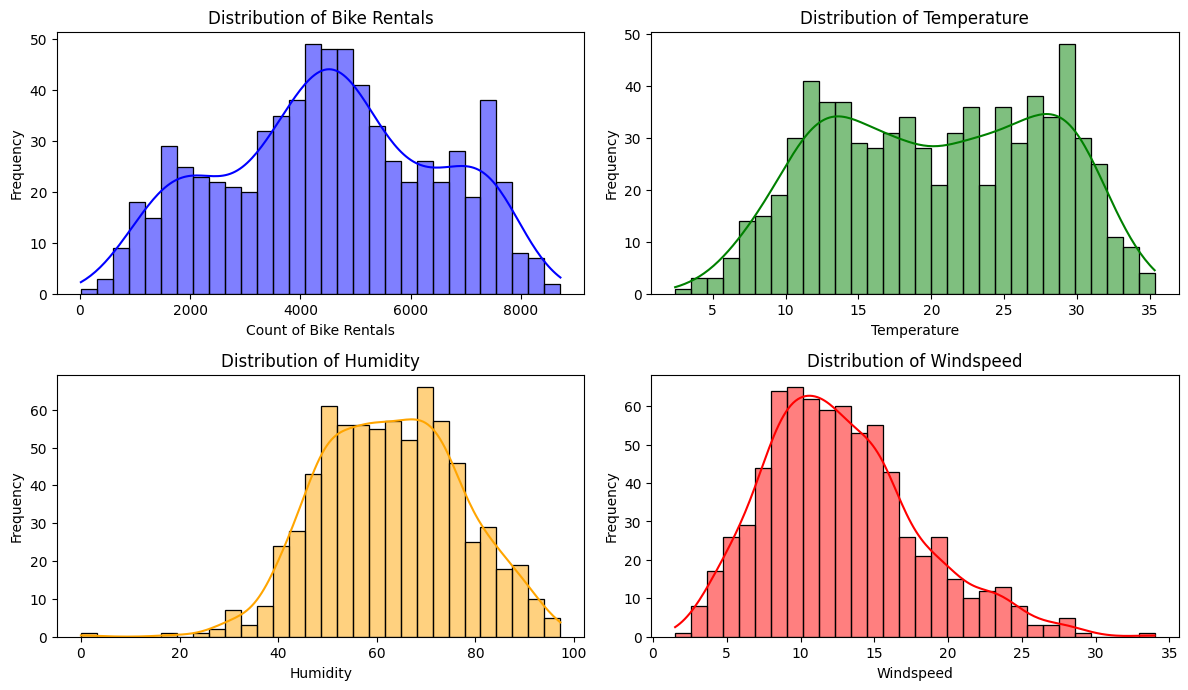

In [96]:
# Histograms and KDE plots for numerical variables
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
sns.histplot(bike_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(bike_data['temp'], bins=30, kde=True, color='green')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(bike_data['hum'], bins=30, kde=True, color='orange')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.histplot(bike_data['windspeed'], bins=30, kde=True, color='red')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

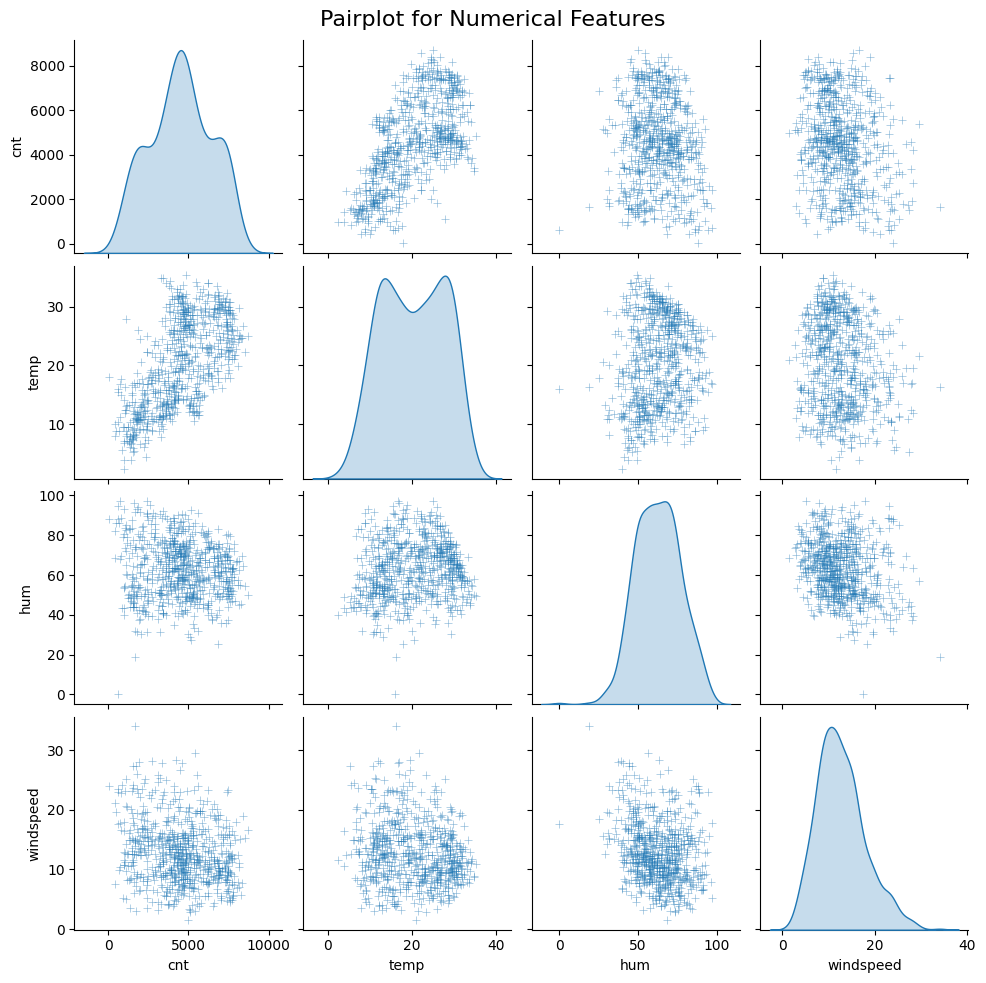

In [98]:
# Pairplot for numerical features
sns.pairplot(bike_data[['cnt', 'temp', 'hum', 'windspeed']], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot for Numerical Features', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

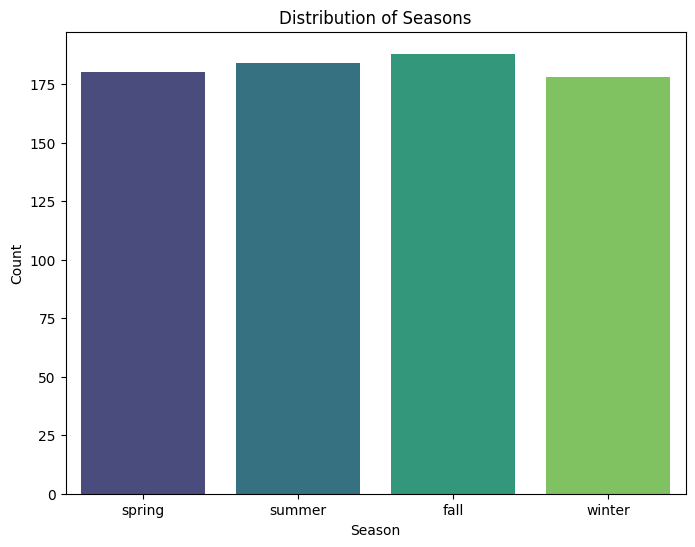

In [100]:
# Bar plot for 'season'
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=bike_data, palette='viridis')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

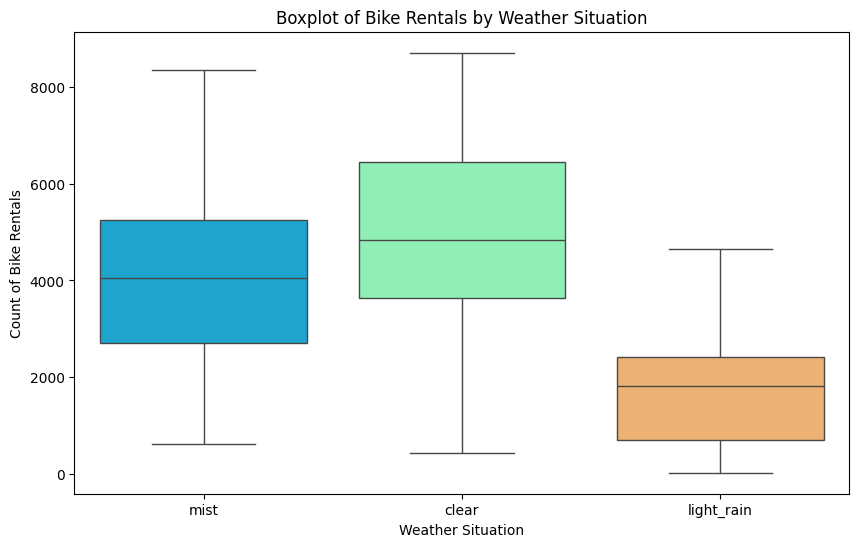

In [102]:
#Box plot for 'weathersit' vs 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=bike_data, palette='rainbow')
plt.title('Boxplot of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Bike Rentals')
plt.show()

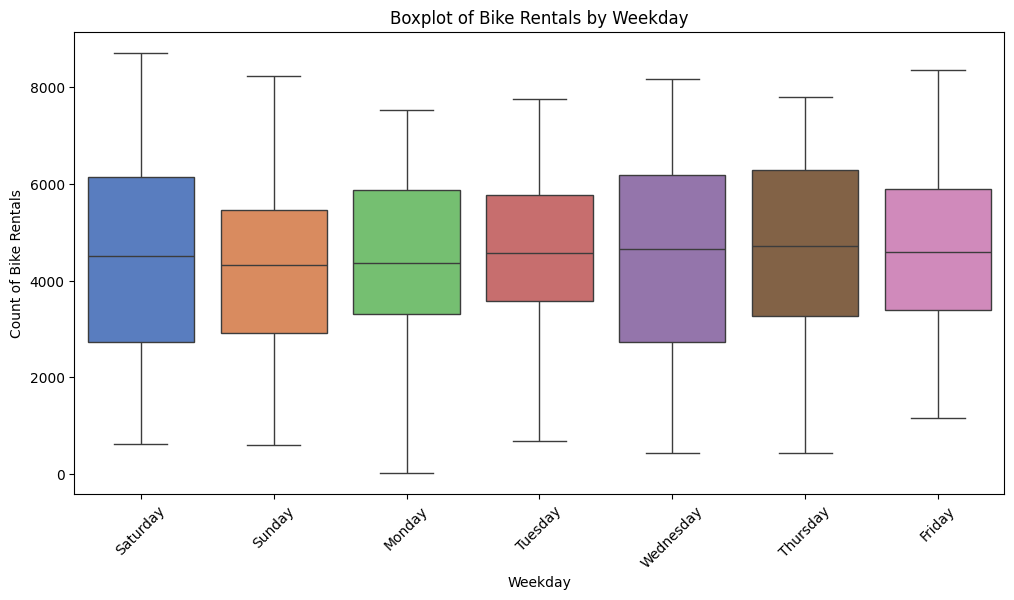

In [108]:
# Box plot for 'weekday' vs 'cnt'
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=bike_data, palette='muted')
plt.title('Boxplot of Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of Bike Rentals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

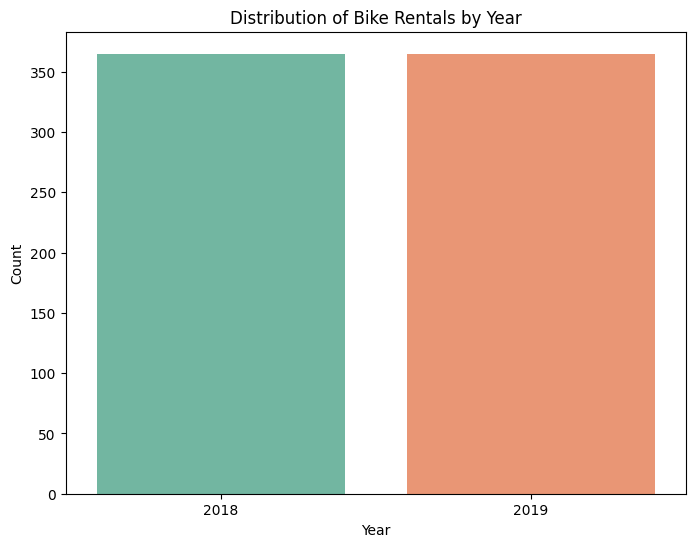

In [110]:
# Bar plot for 'yr'
plt.figure(figsize=(8, 6))
sns.countplot(x='yr', data=bike_data, palette='Set2')
plt.title('Distribution of Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

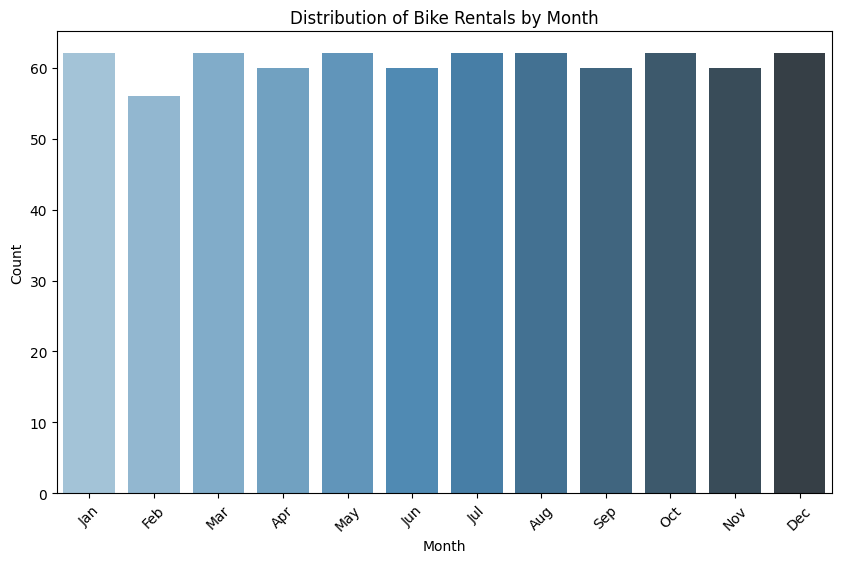

In [112]:
# Bar plot for 'mnth'
plt.figure(figsize=(10, 6))
sns.countplot(x='mnth', data=bike_data, palette='Blues_d')
plt.title('Distribution of Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

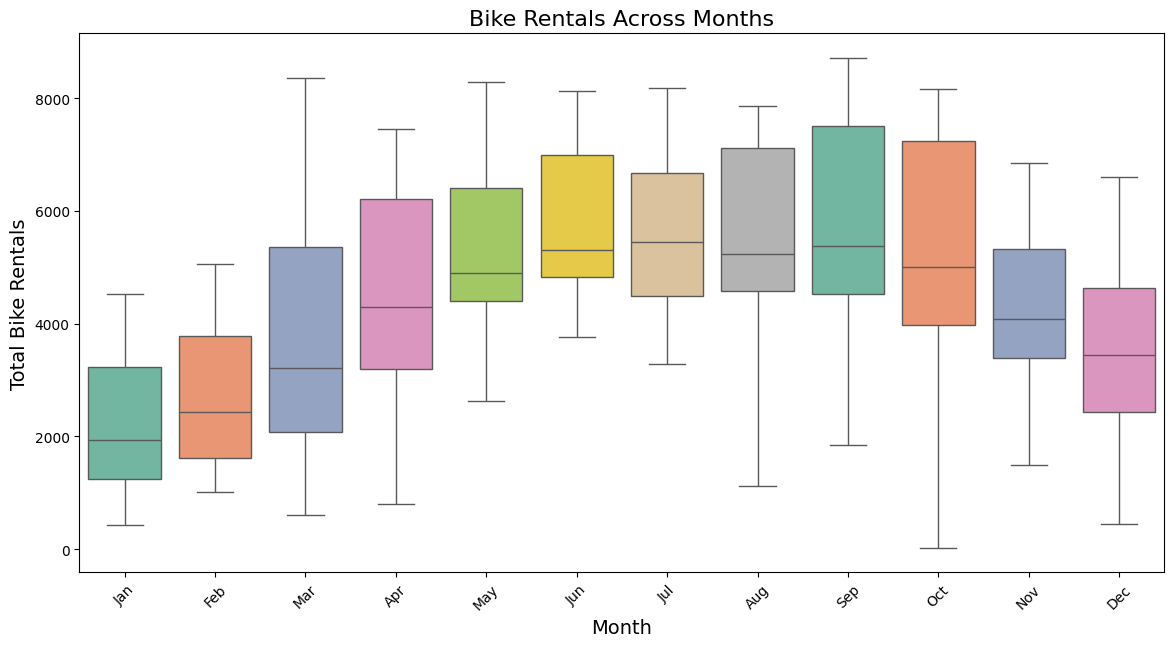

In [121]:
# Boxplot for Month vs. Total Bike Rentals
plt.figure(figsize=(14, 7))
sns.boxplot(x='mnth', y='cnt', data=data, palette='Set2')
plt.title('Bike Rentals Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Bike Rentals', fontsize=14)
plt.xticks(rotation=45)

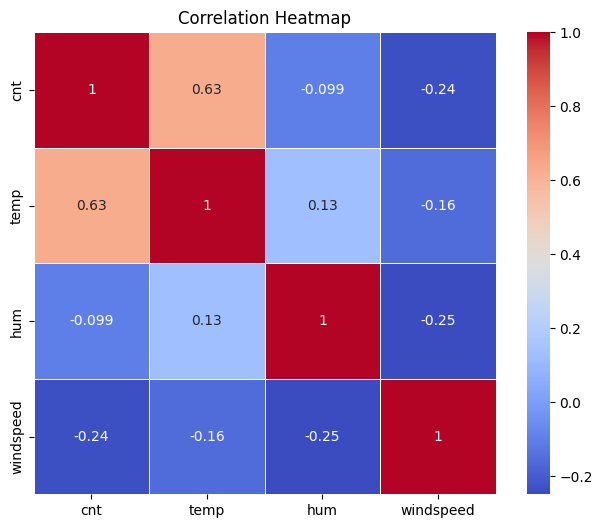

In [117]:
# Correlation matrix heatmap
corr_df = bike_data[['cnt', 'temp', 'hum', 'windspeed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [124]:
# Summary statistics after filling missing values and creating dummy variables
summary_stats = bike_data.describe()
summary_stats

,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.167266,0.465405,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Stage 2: Splitting the Data into Training and Testing Sets

In [137]:
from sklearn.model_selection import train_test_split

bike_data_m = bike_data_dummies

# Define the feature variables and the target variable
# 'cnt': This is the target variable representing the total number of bike rentals, so it needs to be separated from the features.
# 'casual' and 'registered': These columns are components of the 'cnt' variable (casual + registered = cnt). Including them in the feature set would lead to data leakage, where the model might directly learn the target variable instead of the underlying patterns.
X = bike_data_m.drop(columns=['cnt'])
y = bike_data_m['cnt']

# Split data into training and testing sets
# train_size=0.7 means 70% of the data will be used for training
# test_size=0.3 means 30% of the data will be used for testing
# random_state=100 ensures the split is reproducible and consistent across different runs
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
X.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_light_rain',
       'weathersit_mist', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [141]:
#checking shape of train and test dataframe
print("Train dataframe : ",X_train.shape)
print("Test dataframe : ",X_test.shape)

Train dataframe :  (510, 28)
Test dataframe :  (219, 28)


### 2.1 Feature Scaling
Apply scaling techniques (such as standardization or normalization) to ensure all features have a comparable scale, which improves model performance and interpretability.

In [147]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are already defined from train_test_split
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
# Convert the scaled data back to a DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [153]:
# Display the first few rows of the scaled training data
print("First few rows of the scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Summary statistics of scaled features
print("\nSummary statistics of scaled features:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())

First few rows of the scaled training data:
    holiday  workingday      temp       hum  windspeed  season_spring  \
0 -0.161731    0.691564 -0.121335 -0.514725  -0.117752      -0.566783   
1 -0.161731    0.691564  1.231731  0.516433  -0.330615      -0.566783   
2 -0.161731   -1.445998 -0.420478 -0.069854  -0.385694       1.764342   
3 -0.161731   -1.445998 -1.294913 -1.045032   2.018143       1.764342   
4 -0.161731   -1.445998 -0.627580 -1.000840  -0.779889      -0.566783   

   season_summer  season_winter  weathersit_light_rain  weathersit_mist  ...  \
0      -0.569803       1.736591              -0.174078        -0.722764  ...   
1      -0.569803      -0.575841              -0.174078        -0.722764  ...   
2      -0.569803      -0.575841              -0.174078         1.383577  ...   
3      -0.569803      -0.575841              -0.174078        -0.722764  ...   
4       1.754993      -0.575841              -0.174078         1.383577  ...   

   mnth_May  mnth_Nov  mnth_Oct  mnt

Visualizing the features before and after scaling provides insights into how the data is transformed, ensuring that the preprocessing step of scaling is correctly applied

Visulization helps us to understand

Original data distribution and detects potential issues like outliers
Scaled process has standardized the features, ensuring they contribute equally during model training

In [158]:
import math

def plot_histograms(data, title):
    num_features = data.shape[1]
    num_cols = 4  # Number of columns in the subplot grid
    num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed

    plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjust figure size dynamically
    for i, column in enumerate(data.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data[column], kde=True)
        plt.title(f'{title} - {column}')
    plt.tight_layout()
    plt.show()

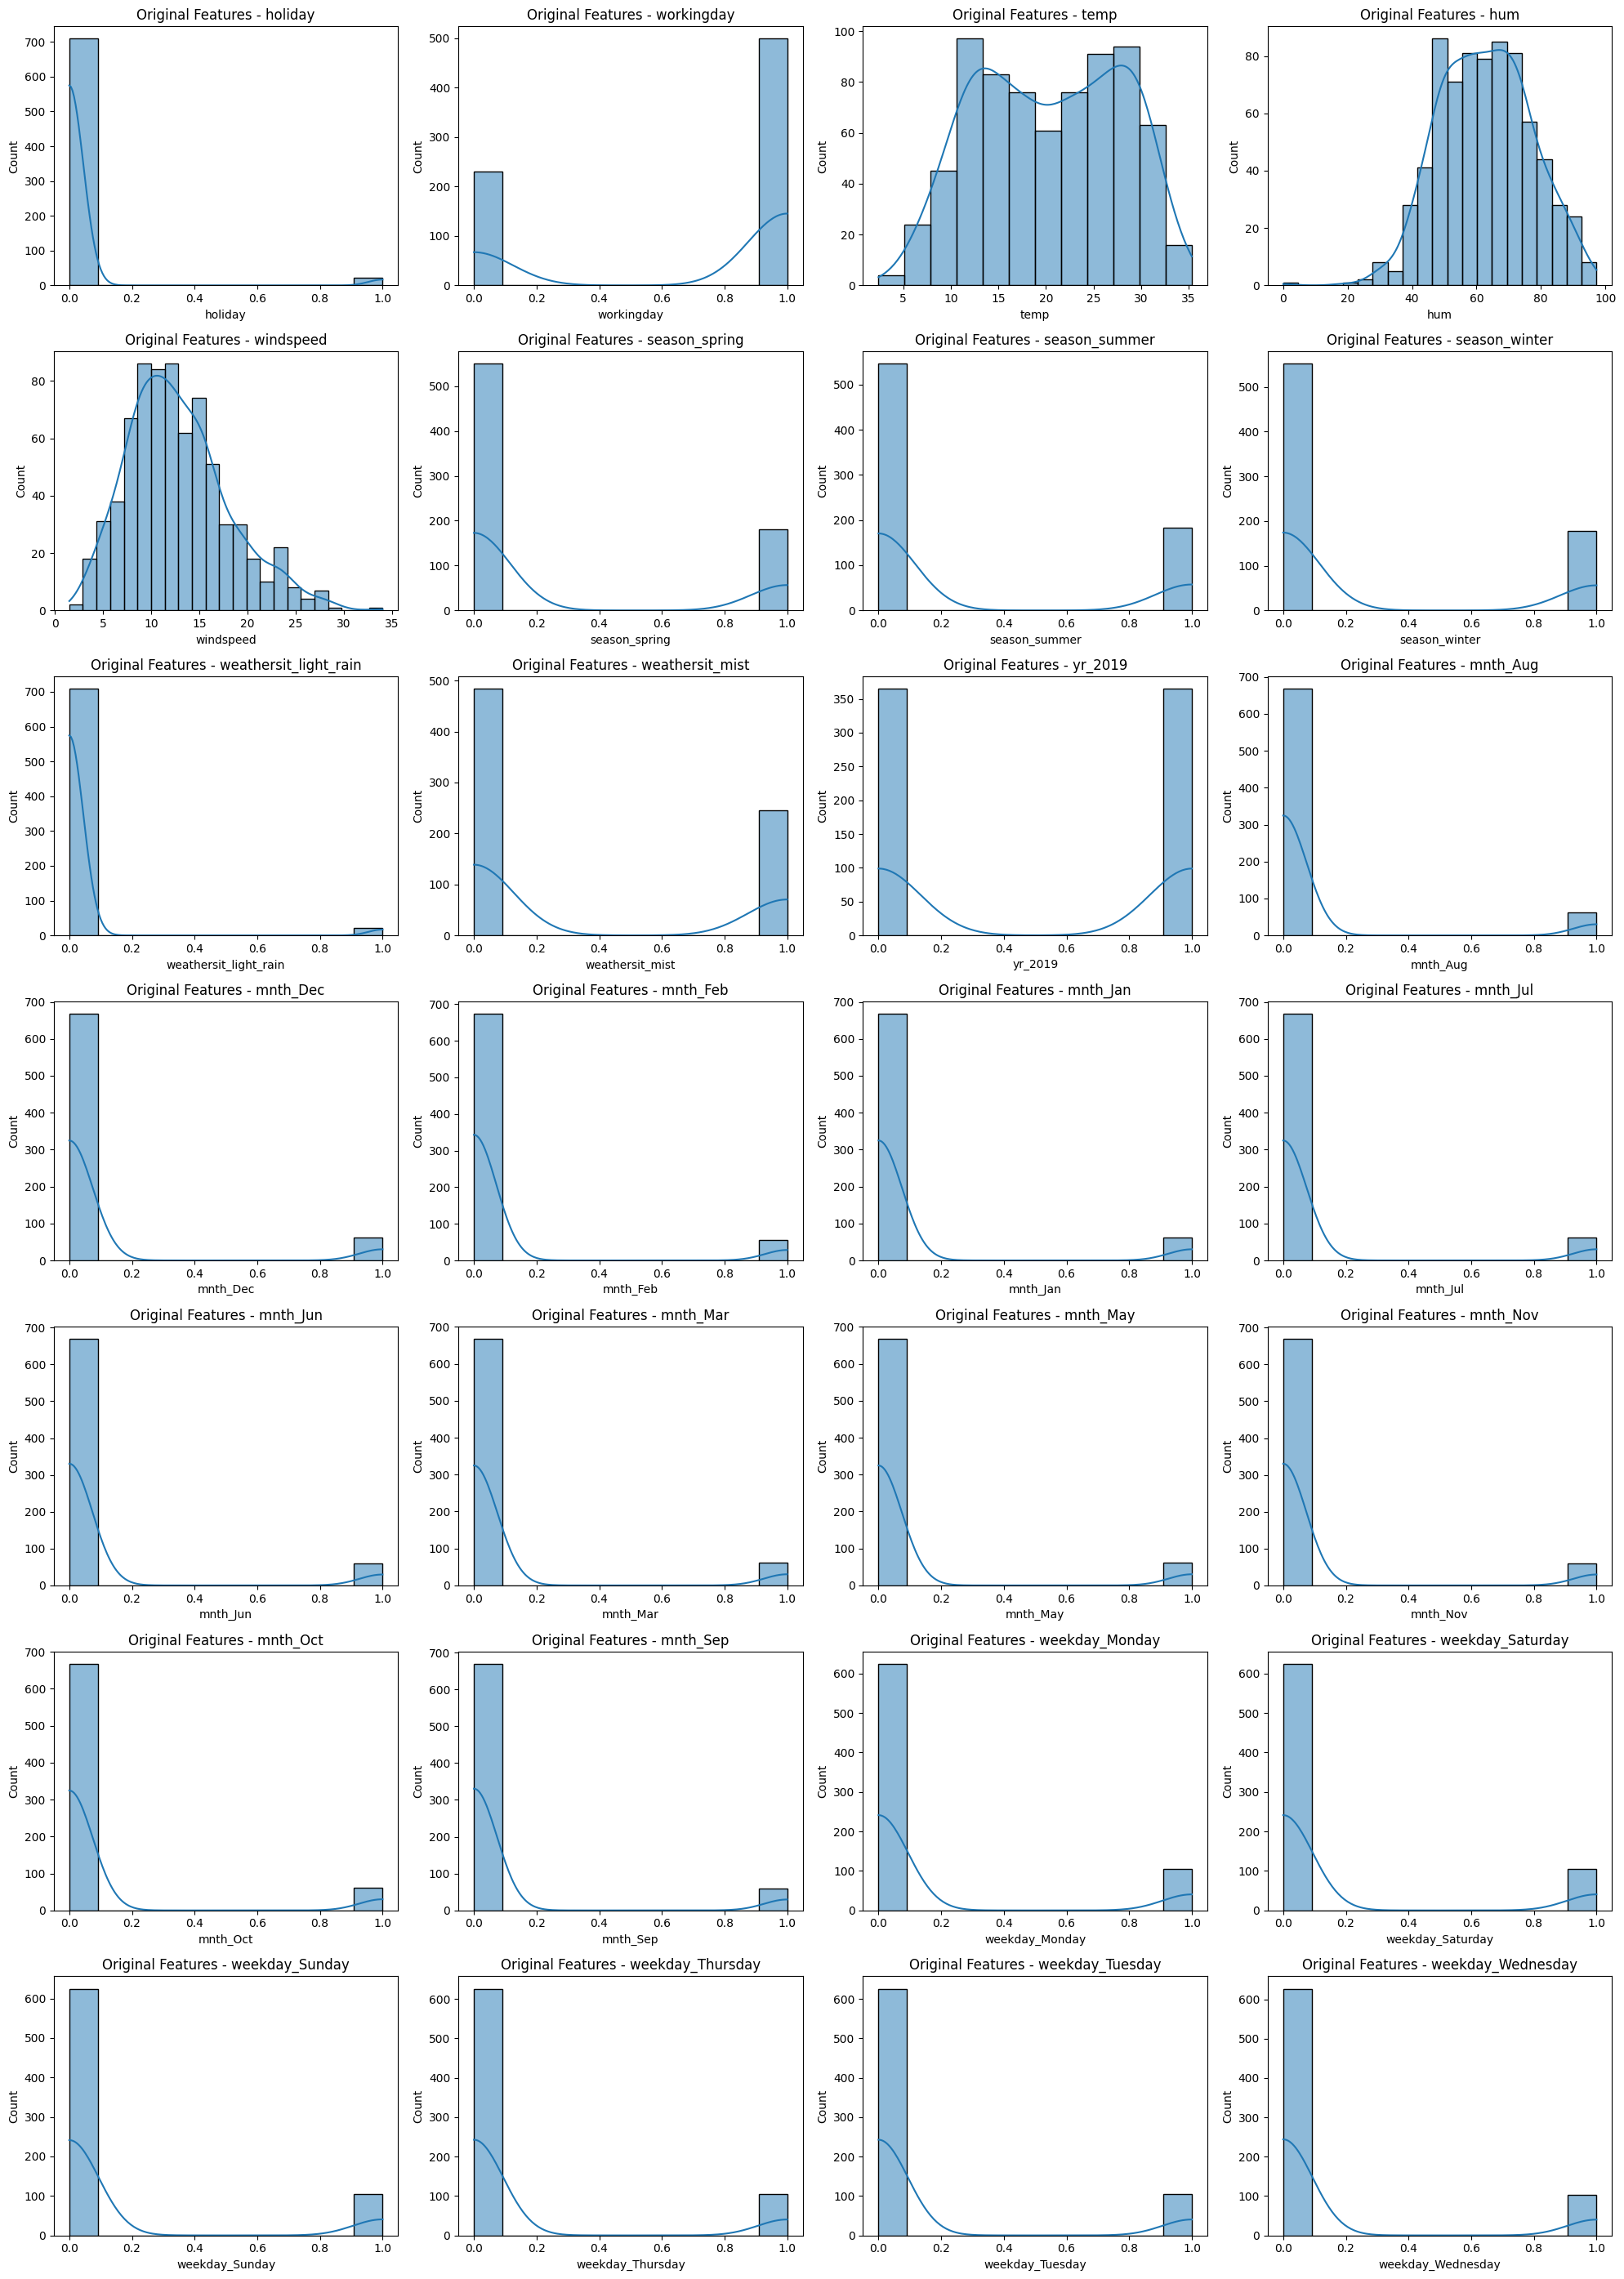

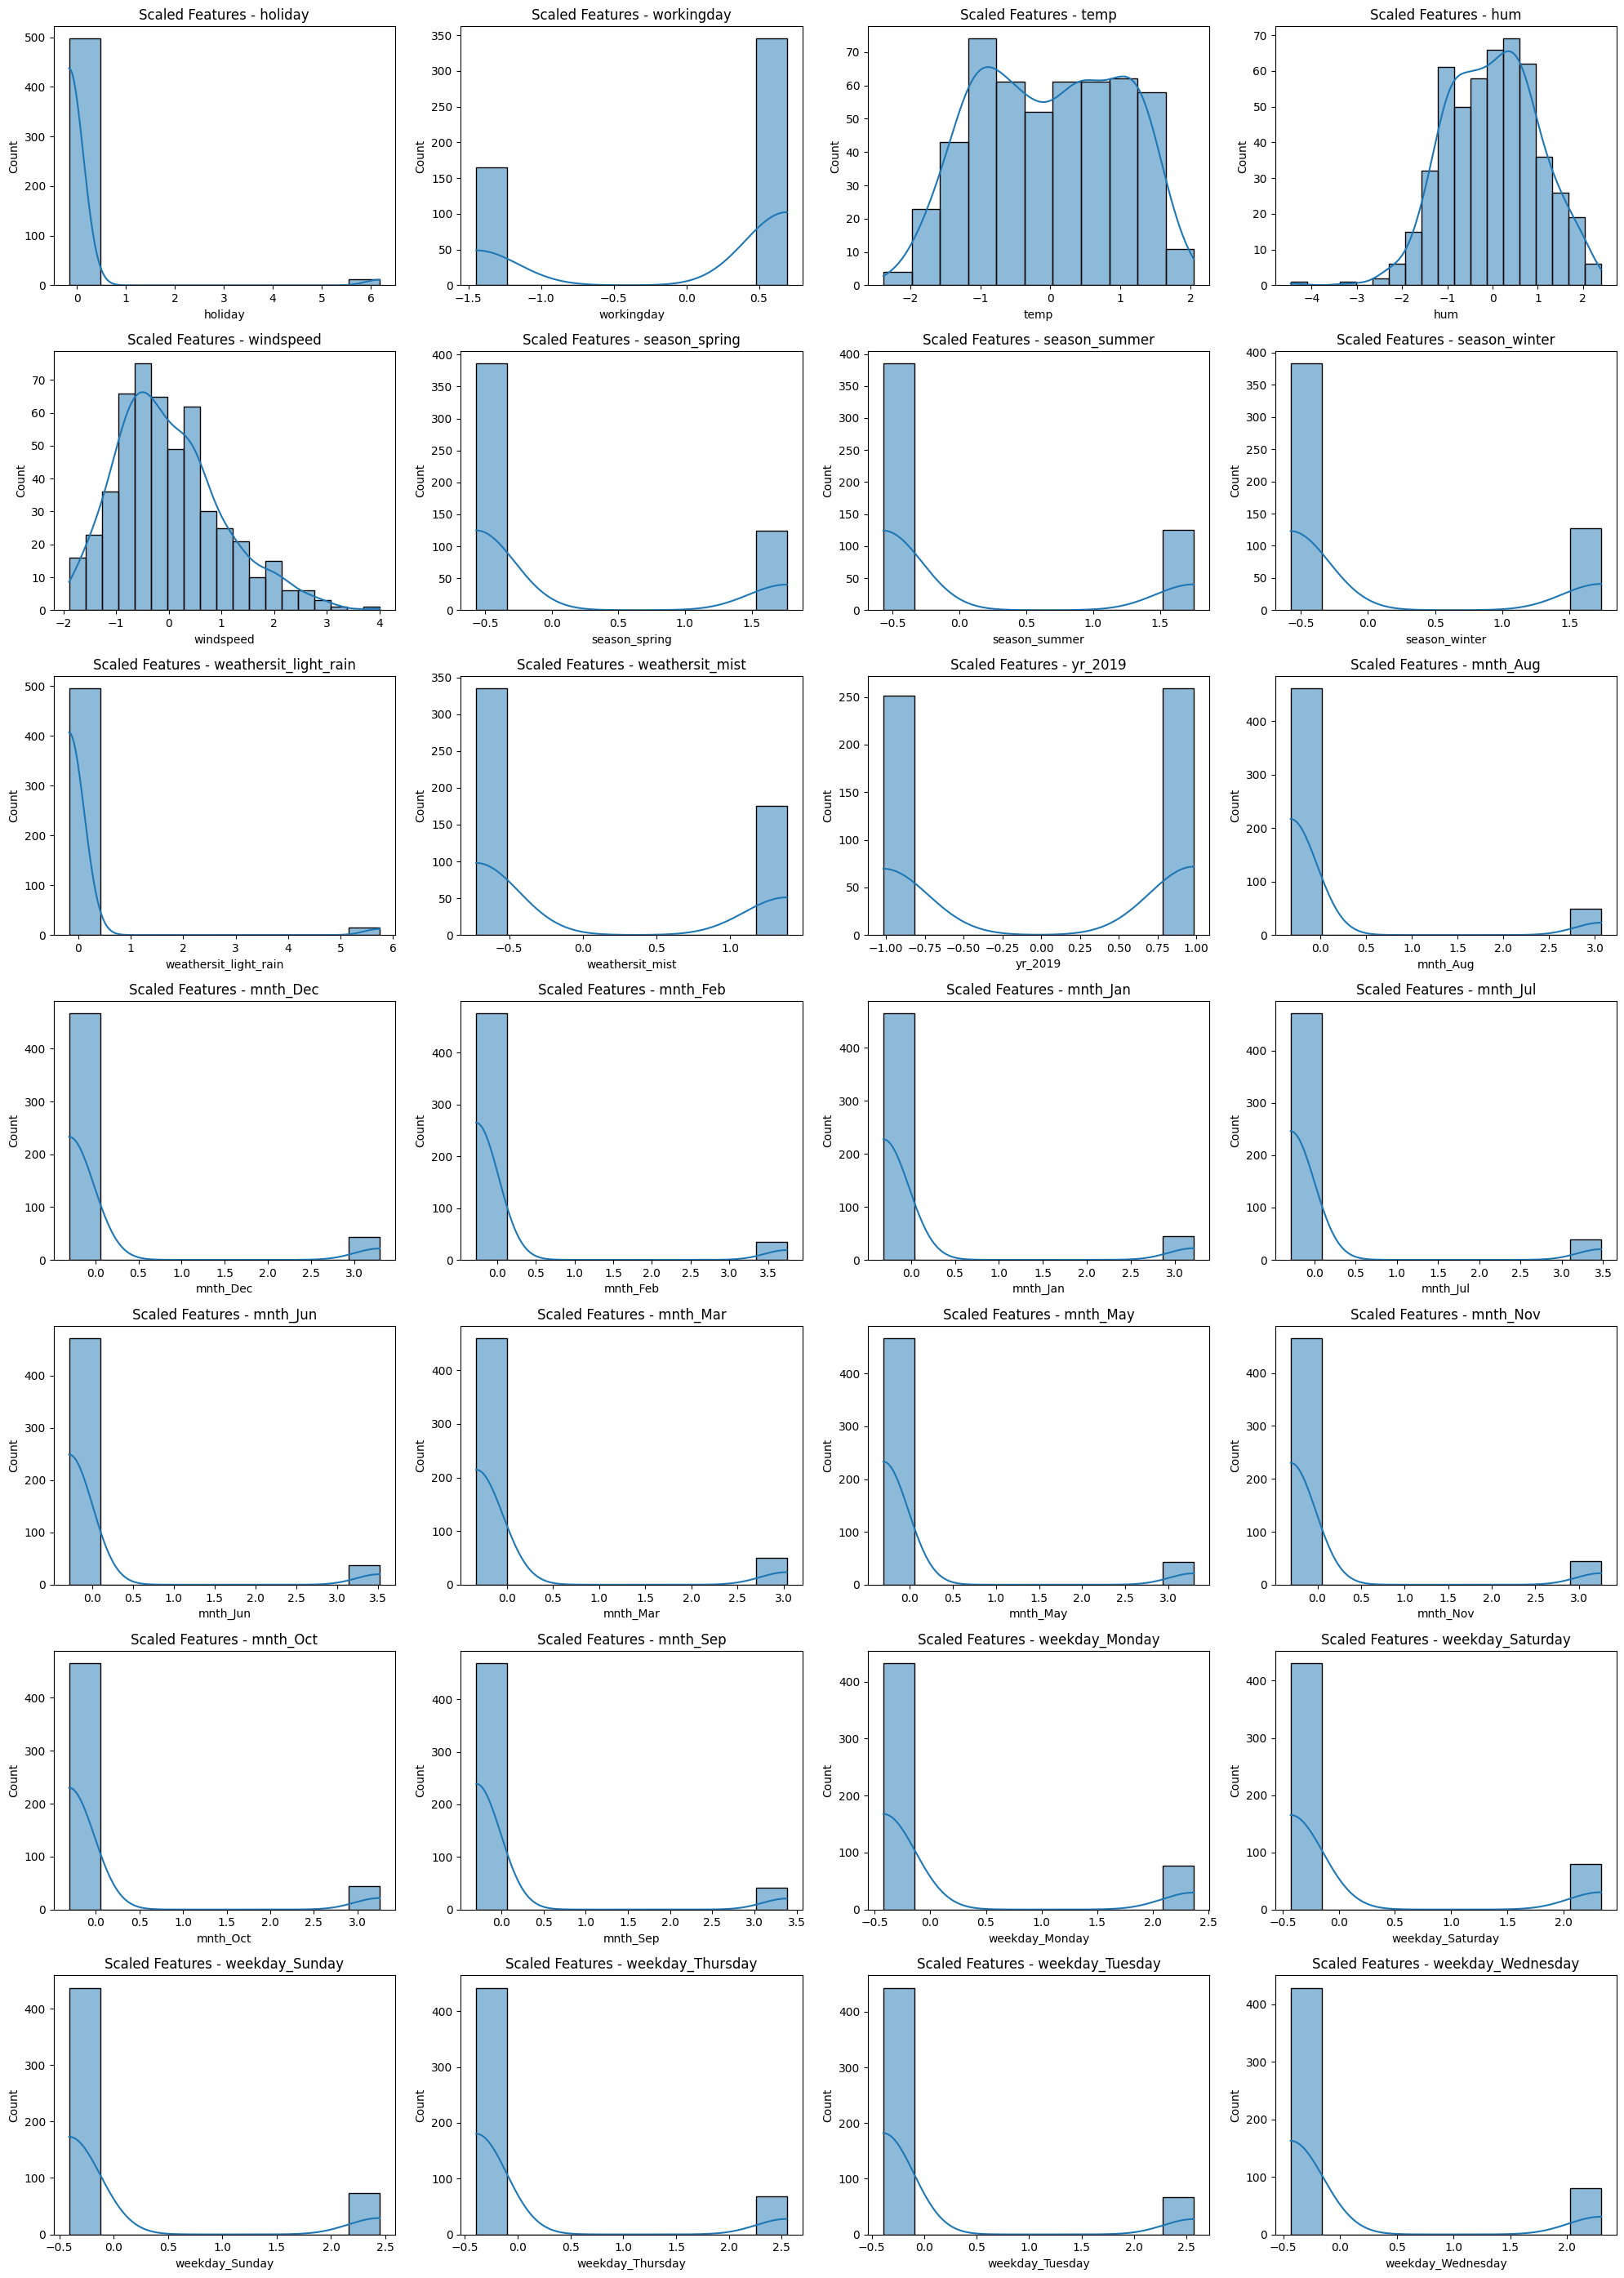

In [161]:
# Plot original features
plot_histograms(X, 'Original Features')

# Plot scaled features
plot_histograms(X_scaled_df, 'Scaled Features')

# Stage 3: Model Building and Predictions and Evaluation

In [166]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Fit the model with selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

model.fit(X_train_selected, y_train)

LinearRegression()

In [169]:
# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(selected_features, model.coef_)))

Intercept: 4489.627107486655
Coefficients: {'holiday': 1.1581891412134904e+16, 'workingday': 3.437804200889066e+16, 'temp': 1183.087556519315, 'season_summer': 251.07391260344377, 'season_winter': 511.15023988985376, 'weathersit_light_rain': -431.7725683051496, 'weathersit_mist': -305.1044257623328, 'yr_2019': 1002.1361594578851, 'weekday_Saturday': 2.6587763009329628e+16, 'weekday_Sunday': 2.573545001712546e+16}


### 3.1 Model Prediction
Model Performance: R-squared values (r2_train and r2_test) assess how well the model fits the data on both training and test sets.

In [176]:
# Predictions on training and test sets
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [179]:
# Calculate R-squared on training and test sets
from sklearn.metrics import r2_score

# Calculate R-squared and RMSE on training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('R-squared on Training set:', r2_train)
print('R-squared on Test set:', r2_test)
print('RMSE on Training set:', rmse_train)
print('RMSE on Test set:', rmse_test)

R-squared on Training set: 0.8096343419194931
R-squared on Test set: 0.7936497387650143
RMSE on Training set: 850.9092300033661
RMSE on Test set: 860.4980093825654


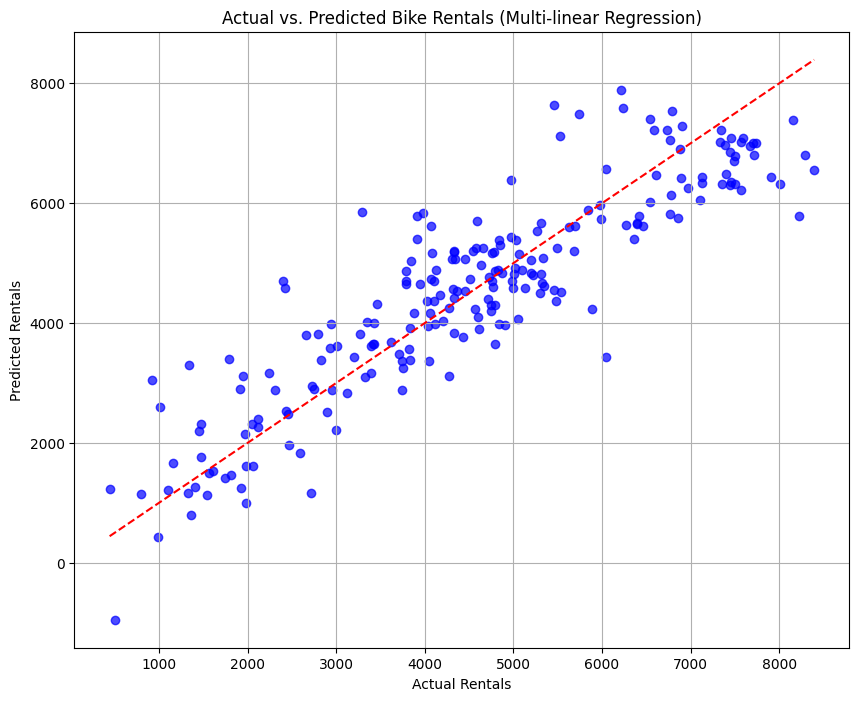

In [182]:
# Plot Actual vs Predicted for Test set
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Bike Rentals (Multi-linear Regression)')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.grid(True)
plt.show()

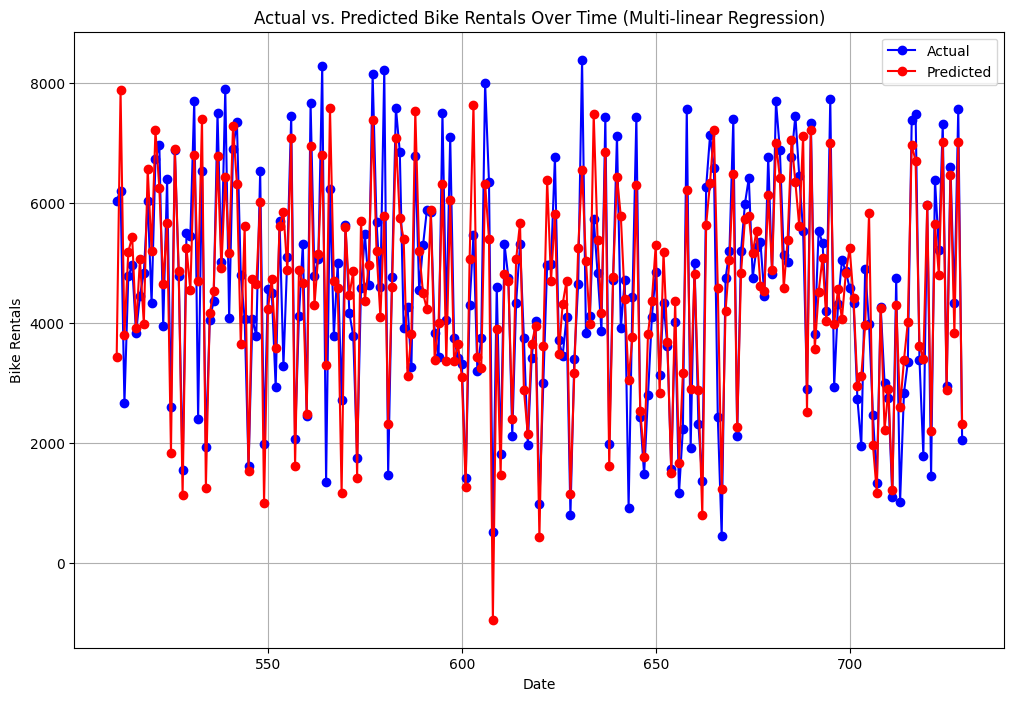

In [185]:
# Actual vs Predicted over time for Test set
plt.figure(figsize=(12, 8))
plt.plot(bike_data.index[-len(y_test):], y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(bike_data.index[-len(y_test):], y_pred_test, marker='o', linestyle='-', color='red', label='Predicted')
plt.title('Actual vs. Predicted Bike Rentals Over Time (Multi-linear Regression)')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Residual Analysis and Predictions

1. Residual Analysis: Helps in diagnosing the model's performance and identifying any patterns or biases in predictions.
2. Visualization: Clear and concise plots using matplotlib and seaborn libraries enhance understanding of model behavior and residuals.

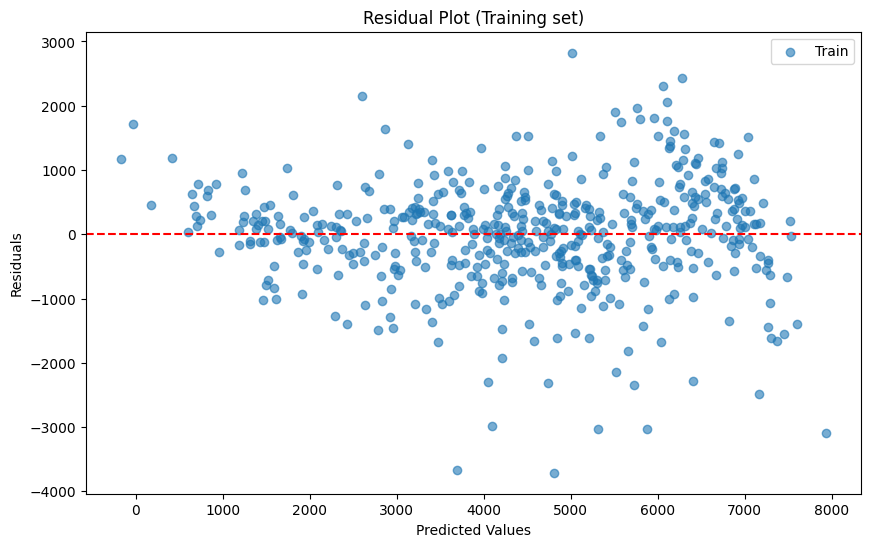

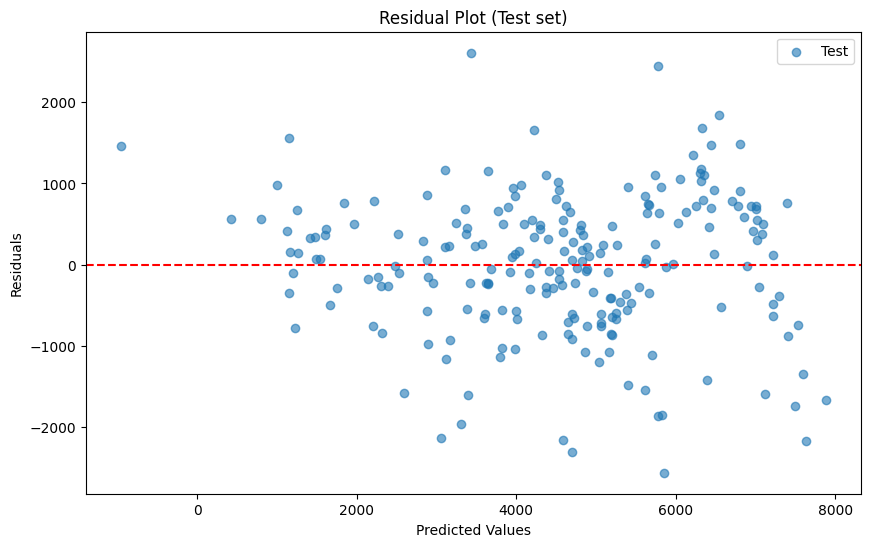

In [190]:
# Residual Analysis
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Residual Plot for Training set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6, label='Train')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Training set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residual Plot for Test set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.6, label='Test')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Test set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

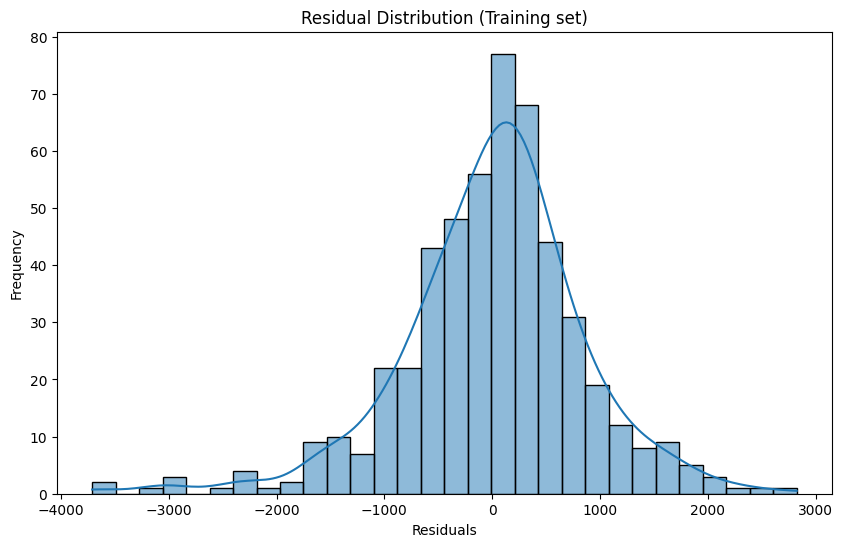

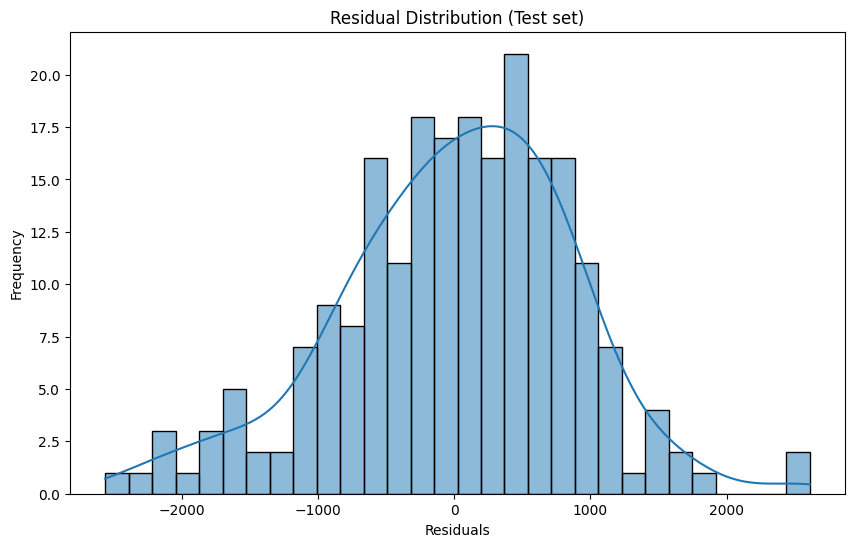

In [193]:
# Residual Distribution for Training set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, bins=30, kde=True)
plt.title('Residual Distribution (Training set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Distribution for Test set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, bins=30, kde=True)
plt.title('Residual Distribution (Test set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

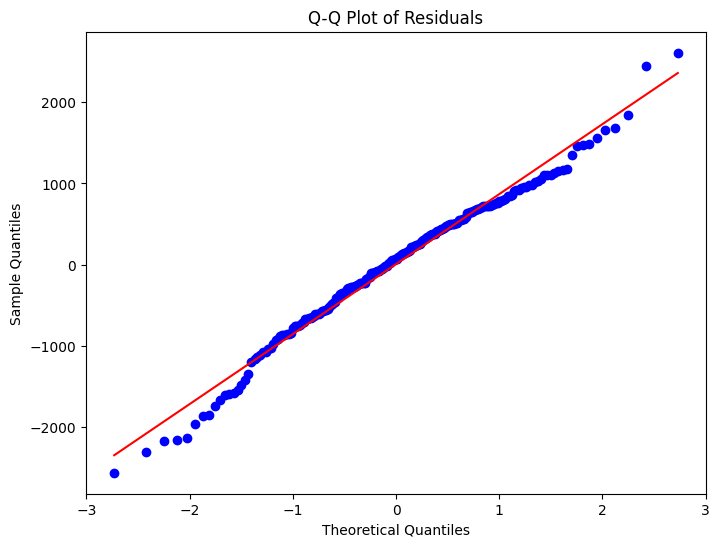

In [215]:
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_test

# Generate Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### 3.3 Variable Importance Plot (VIP) using statsmodels

In [217]:
import statsmodels.api as sm

X_train_selected_sm = sm.add_constant(X_train_selected)
ols_model = sm.OLS(y_train, X_train_selected_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          6.52e-174
Time:                        15:14:41   Log-Likelihood:                -4164.0
No. Observations:                 510   AIC:                             8348.
Df Residuals:                     500   BIC:                             8390.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4486.3824     38.036    117.952      0.0

The provided OLS Regression Results indicate a model performance with an R-squared of 0.810, indicating that the model explains approximately 81% of the variance in the dependent variable (cnt), which represents the total number of bike rentals

In [228]:
np.any(np.isinf(bike_data_m))

False

In [238]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame with all numeric columns selected
# Drop non-numeric or non-relevant columns if necessary
numeric_cols = X.select_dtypes(include=['int', 'float']).columns
X_New = X[numeric_cols]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X_New.columns
vif_data['VIF'] = [variance_inflation_factor(X_New.values, i) for i in range(len(X_New.columns))]

# Display the VIF results
print(vif_data)

      Feature        VIF
0       const  43.102617
1     holiday   1.068703
2  workingday   1.071062
3        temp   1.037457
4         hum   1.075489
5   windspeed   1.084608


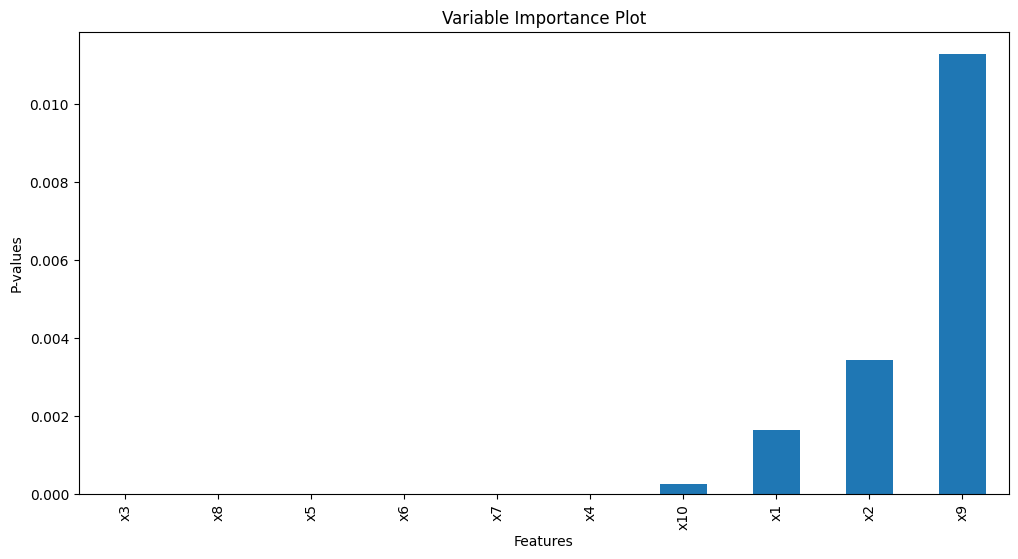

In [243]:
# Extract p-values and plot VIP
p_values = ols_model.pvalues[1:]  # Exclude the intercept
p_values = p_values.sort_values()

plt.figure(figsize=(12, 6))
p_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('Variable Importance Plot')
plt.show()

# Stage 4: Model Evaluation 

In [250]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_test = model.predict(X_test_selected)

# Calculate R-squared on test set
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared on Test set: {r2_test:.2f}')

R-squared on Test set: 0.79


In [253]:
# Calculate other metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'Mean Squared Error on Test set: {mse_test:.2f}')
print(f'Mean Absolute Error on Test set: {mae_test:.2f}')
print(f'Root Mean Squared Error on Test set: {rmse_test:.2f}')

Mean Squared Error on Test set: 740456.82
Mean Absolute Error on Test set: 673.69
Root Mean Squared Error on Test set: 860.50


Text(0, 0.5, 'y_pred')

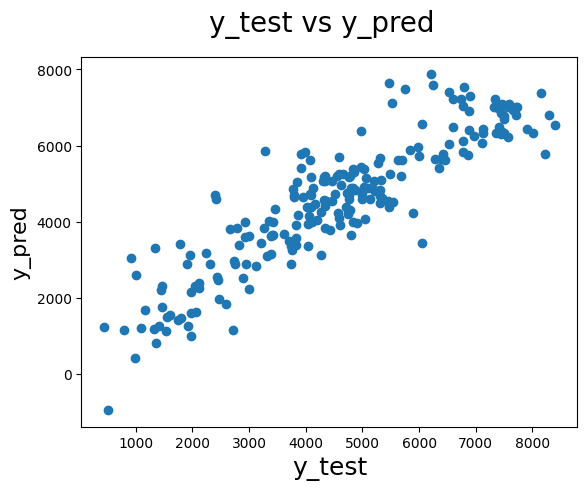

In [259]:
# Plotting y_test and y_pred_test to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)    

# Conclusion for the Overall Problem Statement

> Model Performance:

1. The R-squared value on the training set is 0.81, indicating that 81% of the variability in the bike rental data is explained by the model. This high R-squared value suggests that the model fits the training data well.
2. The R-squared value on the test set is 0.79, which is very close to the training set's R-squared. This consistency suggests that the model generalizes well to unseen data and is not overfitting.

> Error Analysis:

1. The Root Mean Squared Error (RMSE) on the training set is 850.91, and on the test set, it is 860.50. These similar RMSE values indicate that the model's predictions are relatively accurate and that it performs consistently on both training and test data.

> Conclusion
1. The model demonstrates strong predictive performance with high R-squared values and low RMSE on both training and test sets.
2. The consistency between training and test performance indicates a well-fitted model with good generalization capabilities, making it reliable for predicting bike rentals based on the selected features.